# Exercise 10.2
### Introduction
Starting with 10,000 atoms of $^{213}Bi$, simuate the decay of the atoms.
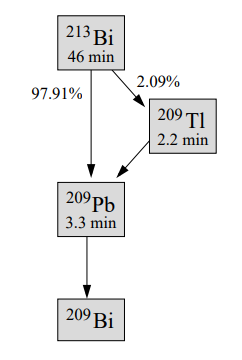
Do this with a time step of 1 second. 

$$ N(t) = N(0) 2^{-t/\tau}$$
$$ p(t) = 1-2^{-t/\tau}$$

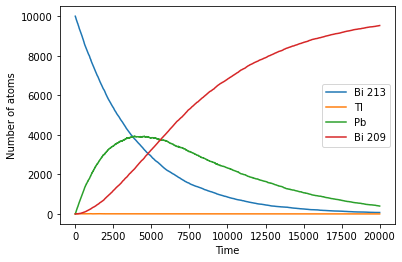

In [20]:
from random import random
from numpy import arange, log
from pylab import plot,xlabel,ylabel,show,legend

# Constants
h = 1.0               # Size of time-step in seconds

NBi213 = 10_000            # Number of 213 Bi
TBi213 = 46*60         #Bi 213 half life
pBi = 1 - 2**(-h/TBi213)   # Probability of decay in one step

NTl = 0               # Number of Tl
TTl = 2.2*60          #Half life of Tl
pTl = 1 - 2**(-h/TTl)   # Probability of decay in one step

NPb = 0               # Number of 209Pb atoms
TPb = 50*60
pPb = 1 - 2**(-h/TPb)   # Probability of decay in one step

NBi209 = 0            # Number of 209 Bi atoms

tmax = 20_000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Bi213points = []
Tlpoints = []
Pbpoints = []
Bi209points = []

# Main loop
for t in tpoints:
    Bi213points.append(NBi213)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi209points.append(NBi209)
    
    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NPb):
        if random()<pPb:
            decay += 1
    NPb -= decay
    NBi209 += decay
    
    decay = 0
    for i in range(NTl):
        if random()<pTl:
            decay+= 1
    NTl -= decay
    NPb += decay
    
    Pbdecay = 0
    Tldecay = 0
    for i in range(NBi213):
        if random()<pBi:
            if random()<.9791:
                Pbdecay +=1
            else:
                Tldecay += 1
    NBi213 -= Pbdecay+Tldecay
    NPb += Pbdecay
    NTl += Tldecay
                

# Make the graph
plot(tpoints,Bi213points,label='Bi 213')
plot(tpoints,Tlpoints,label='Tl')
plot(tpoints,Pbpoints,label = 'Pb')
plot(tpoints,Bi209points,label = 'Bi 209')
xlabel("Time")
ylabel("Number of atoms")
legend()
show()

### Conclusion
Wow this is cool. It shows that the atoms do not stay as Pb or Tl for long.
If you play with half lives, it works.

# Exercise 10.5
### Introduction
a) Write a program to evaluate the integral in Eq. (10.22) using the “hit-or-miss” Monte Carlo method of Section 10.2 with 10 000 points. Also evaluate the error on your estimate.

b) Now estimate the integral again using the mean value method with 10 000 points. Also evaluate the error

$$ I = \int_{0}^{2} \sin{^2{1 \over x(2-x)}}dx$$

In [26]:
from math import sin,sqrt
from random import random, randrange
from numpy import array


def f(x):
    return (sin(1/(x*(2-x))))**2

#Part A
N = 10000
count = 0
for i in range(N):
    x = 2*random()
    y = random()
    if y<f(x):
        count += 1
I = 2*count/N
A = 2
σ = sqrt(I*(A-I))/sqrt(N)
print(f'The integral evaluates to {I:.4f} ± {σ:.5f} using the hit or miss method')

# Part B
a = 0
b = 2
N = 10000
fvals = []
for i in range(N):
    fvals.append(random()*b)
fSum = sum(fvals)
fvalarray = array(fvals)
varF = 1/N*sum(fvalarray*fvalarray)-(1/N*fSum)**2
I = (b-a)/N * fSum
σ = (b-a)*sqrt(varF)/sqrt(N)
print(f'The integral evaluates to {I:.4f} ± {σ:.5f} using the mean value theorem')

The integral evaluates to 1.4472 ± 0.00894 using the hit or miss method
The integral evaluates to 2.0132 ± 0.01149 using the mean value theorem


### Conclusion
Thank you for explaining the concepts behind it in class. I could not understand why these methods exist until you explained.